## **Multi-layer Perceptron Classifier from Scratch**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The generate_data function creates synthetic non-linear classification data with multiple classes. This function is particularly useful for testing and validating machine learning models, as it generates data with complex decision boundaries and non-linear relationships between features.

##### Parameters

- `n_samples` (eint, default=1000): Number of samples to generate
- `n_features` (int, default=5): Number of input features
- `n_classes` (int, default=3): Number of classes for classification
- `noise_level` (float, default=0.1): Standard deviation of Gaussian noise
- `random_state` (int, optional): Random seed for reproducibility

##### Returns

X: Array of shape (n_samples, n_features) containing the input features
y_onehot: One-hot encoded labels of shape (n_samples, n_classes)



In [5]:
def generate_data(n_samples=1000, n_features=5, n_classes=3, noise_level=0.1, random_state=None):
    """
    Generate non-linear classification data with multiple classes
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    X = np.random.randn(n_samples, n_features) * 2
    
    logits = np.zeros((n_samples, n_classes))
    
    for i in range(n_classes):
        logits[:, i] = (
            3.0 * np.sin(X[:, 0] / 2 + i) +  
            2.0 * np.cos(X[:, 1] * 1.5 - i) +  
            1.5 * X[:, 2]**2 +  
            1.0 * np.exp(-0.5 * X[:, 3]**2) +  
            0.5 * X[:, 4] +  
            0.5 * X[:, 0] * X[:, 1] +  
            0.3 * np.maximum(X[:, 2], 0)
        )
    
    logits += np.random.normal(0, noise_level, logits.shape)
    
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    probabilities = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    
    y = np.argmax(probabilities, axis=1)
    
    y_onehot = np.zeros((n_samples, n_classes))
    y_onehot[np.arange(n_samples), y] = 1
    
    return X, y_onehot

### Neural Network Architecture

Our Multi-Layer Perceptron implements a feed-forward neural network that processes information through multiple layers of neurons. Each neuron computes a weighted sum of its inputs, applies a non-linear activation function, and passes the result to the next layer.

### Key Mathematical Components

##### 1. Forward Propagation

For each layer $l$, two main operations occur:

1. Linear transformation:
   $Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$

2. Non-linear activation:
   $A^{[l]} = g^{[l]}(Z^{[l]})$

Where:
- $W^{[l]}$ is the weight matrix (shape: $n^{[l]} \times n^{[l-1]}$)
- $b^{[l]}$ is the bias vector (shape: $n^{[l]} \times 1$)
- $g^{[l]}$ is the activation function
- $A^{[l]}$ is the layer's output (shape: $n^{[l]} \times m$)
- $m$ is the batch size

##### 2. Activation Functions and Their Derivatives

The class implements multiple activation functions, each with specific advantages:

###### ReLU (Rectified Linear Unit)
$g(z) = \max(0, z)$
$g'(z) = \begin{cases} 1 & \text{if } z > 0 \\ 0 & \text{if } z \leq 0 \end{cases}$

Advantages: Reduces vanishing gradient problem, computationally efficient

###### Sigmoid
$g(z) = \frac{1}{1 + e^{-z}}$
$g'(z) = g(z)(1 - g(z))$

Advantages: Outputs between 0 and 1, useful for binary classification

###### Tanh
$g(z) = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
$g'(z) = 1 - \tanh^2(z)$

Advantages: Zero-centered outputs, stronger gradients than sigmoid

##### 3. Loss Function

For classification tasks, we use cross-entropy loss:

$J = -\frac{1}{m}\sum_{i=1}^m\sum_{j=1}^C y_{ij}\log(\hat{y}_{ij}) + \frac{\lambda}{2}\sum_{l=1}^L\|W^{[l]}\|^2$

Where:
- First term is the cross-entropy loss
- Second term is L2 regularization with parameter λ
- $y_{ij}$ is the true label
- $\hat{y}_{ij}$ is the predicted probability

##### 4. Optimization Methods

###### Gradient Descent with Momentum
Updates velocities and parameters:

$v_W^{[l]} = \beta v_W^{[l]} - \alpha \frac{\partial J}{\partial W^{[l]}}$
$W^{[l]} = W^{[l]} + v_W^{[l]}$

Where:
- β is the momentum parameter (typically 0.9)
- α is the learning rate

###### Adam (Adaptive Moment Estimation)
Maintains both first and second moment estimates:

1. Moment updates:
   $m_W^{[l]} = \beta_1 m_W^{[l]} + (1-\beta_1)\frac{\partial J}{\partial W^{[l]}}$
   $v_W^{[l]} = \beta_2 v_W^{[l]} + (1-\beta_2)(\frac{\partial J}{\partial W^{[l]}})^2$

2. Bias correction:
   $\hat{m}_W^{[l]} = \frac{m_W^{[l]}}{1-\beta_1^t}$
   $\hat{v}_W^{[l]} = \frac{v_W^{[l]}}{1-\beta_2^t}$

3. Parameter update:
   $W^{[l]} = W^{[l]} - \alpha\frac{\hat{m}_W^{[l]}}{\sqrt{\hat{v}_W^{[l]}}+\epsilon}$

### Regularization Techniques

##### 1. Dropout
During training, each neuron has a probability $p$ of being temporarily "dropped":

$A^{[l]}_{\text{dropout}} = A^{[l]} * \text{mask}^{[l]}$
where $\text{mask}^{[l]} \sim \text{Bernoulli}(p)$

To maintain expected values:
$A^{[l]}_{\text{dropout}} = \frac{A^{[l]}_{\text{dropout}}}{1-p}$

##### 2. L2 Regularization
Adds weight decay term to loss:
$J_{\text{regularized}} = J + \frac{\lambda}{2}\sum_{l=1}^L\|W^{[l]}\|^2$

##### Example Usage

```python
# Initialize network
mlp = MultiLayerPerceptron(
    layer_sizes=[input_size, hidden_size, output_size],
    learning_rate=0.001,
    activation='relu',
    optimizer='adam'
)

# Train
mlp.train(X_train, y_train)

# Predict
predictions = mlp.predict(X_test)
```

## Understanding the Forward Pass

1. Input layer ($A^{[0]} = X$)
2. For each hidden layer $l$:
   - Compute weighted sum: $Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$
   - Apply activation: $A^{[l]} = g^{[l]}(Z^{[l]})$
   - Apply dropout if enabled
3. Output layer:
   - Compute final layer: $Z^{[L]} = W^{[L]}A^{[L-1]} + b^{[L]}$
   - Apply softmax: $\hat{y} = \text{softmax}(Z^{[L]})$

## Understanding the Backward Pass

1. Output layer error:
   $dZ^{[L]} = \hat{y} - y$

2. For each layer $l$ from $L-1$ to $1$:
   - Compute gradients:
     $dW^{[l]} = \frac{1}{m}dZ^{[l]}A^{[l-1]T} + \lambda W^{[l]}$
     $db^{[l]} = \frac{1}{m}\sum dZ^{[l]}$
   - Compute error for next layer:
     $dZ^{[l-1]} = W^{[l]T}dZ^{[l]} * g'^{[l-1]}(Z^{[l-1]})$

In [8]:
class MultiLayerPerceptron:
    def __init__(
        self,
        layer_sizes,
        learning_rate=0.01,
        max_epochs=1000,
        activation='relu',
        optimizer='adam',
        weight_init='he',
        batch_size=32,
        dropout_rate=0.0,
        l2_lambda=0.0,
        momentum=0.9,
        early_stopping_patience=10,
        learning_rate_decay=0.0,
        validation_split=0.2
    ):
        """
        Enhanced Multi-Layer Perceptron for Classification
        """
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.initial_learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.activation = activation
        self.optimizer = optimizer
        self.weight_init = weight_init
        self.batch_size = batch_size
        self.dropout_rate = dropout_rate
        self.l2_lambda = l2_lambda
        self.momentum = momentum
        self.early_stopping_patience = early_stopping_patience
        self.learning_rate_decay = learning_rate_decay
        self.validation_split = validation_split
        
        self._initialize_parameters()
        self._initialize_optimizer()
        
        self.training_loss = []
        self.validation_loss = []
        self.training_accuracy = []
        self.validation_accuracy = []
        self.best_validation_loss = float('inf')
        self.patience_counter = 0

    def _initialize_parameters(self):
        """Initialize weights and biases using specified initialization method"""
        self.weights = []
        self.biases = []
        self.dropout_masks = []
        
        for i in range(len(self.layer_sizes) - 1):
            if self.weight_init == 'xavier':
                scale = np.sqrt(2.0 / (self.layer_sizes[i] + self.layer_sizes[i+1]))
            elif self.weight_init == 'he':
                scale = np.sqrt(2.0 / self.layer_sizes[i])
            else: 
                scale = 0.01
            
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * scale
            b = np.zeros((1, self.layer_sizes[i+1]))
            
            self.weights.append(w)
            self.biases.append(b)

    def _initialize_optimizer(self):
        """Initialize optimizer-specific parameters"""
        self.velocity_w = [np.zeros_like(w) for w in self.weights]
        self.velocity_b = [np.zeros_like(b) for b in self.biases]
        
        if self.optimizer == 'adam':
            self.beta1 = 0.9
            self.beta2 = 0.999
            self.epsilon = 1e-8
            self.m_w = [np.zeros_like(w) for w in self.weights]
            self.v_w = [np.zeros_like(w) for w in self.weights]
            self.m_b = [np.zeros_like(b) for b in self.biases]
            self.v_b = [np.zeros_like(b) for b in self.biases]
        elif self.optimizer == 'rmsprop':
            self.beta2 = 0.999
            self.epsilon = 1e-8
            self.v_w = [np.zeros_like(w) for w in self.weights]
            self.v_b = [np.zeros_like(b) for b in self.biases]

    def _activation_function(self, x, derivative=False):
        """Apply activation function"""
        if self.activation == 'sigmoid':
            if not derivative:
                return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
            return x * (1 - x)
        elif self.activation == 'tanh':
            if not derivative:
                return np.tanh(x)
            return 1 - np.tanh(x)**2
        elif self.activation == 'relu':
            if not derivative:
                return np.maximum(0, x)
            return (x > 0).astype(float)
        elif self.activation == 'leaky_relu':
            alpha = 0.01
            if not derivative:
                return np.where(x > 0, x, alpha * x)
            return np.where(x > 0, 1, alpha)

    def _train_val_split(self, X, y):
        """Split data into training and validation sets"""
        indices = np.random.permutation(len(X))
        val_size = int(len(X) * self.validation_split)
        
        val_indices = indices[:val_size]
        train_indices = indices[val_size:]
        
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_val = X[val_indices]
        y_val = y[val_indices]
        
        return X_train, X_val, y_train, y_val

    def _get_batches(self, X, y):
        """Create mini-batches from the data"""
        indices = np.random.permutation(X.shape[0])
        for i in range(0, X.shape[0], self.batch_size):
            batch_indices = indices[i:i + self.batch_size]
            yield X[batch_indices], y[batch_indices]

    def _update_parameters(self, weight_gradients, bias_gradients, t):
        """Update parameters using the specified optimizer"""
        if self.optimizer == 'sgd':
            for i in range(len(self.weights)):
                self.velocity_w[i] = self.momentum * self.velocity_w[i] - self.learning_rate * weight_gradients[i]
                self.velocity_b[i] = self.momentum * self.velocity_b[i] - self.learning_rate * bias_gradients[i]
                
                self.weights[i] += self.velocity_w[i]
                self.biases[i] += self.velocity_b[i]
        
        elif self.optimizer == 'adam':
            for i in range(len(self.weights)):
                self.m_w[i] = self.beta1 * self.m_w[i] + (1 - self.beta1) * weight_gradients[i]
                self.v_w[i] = self.beta2 * self.v_w[i] + (1 - self.beta2) * (weight_gradients[i]**2)
                self.m_b[i] = self.beta1 * self.m_b[i] + (1 - self.beta1) * bias_gradients[i]
                self.v_b[i] = self.beta2 * self.v_b[i] + (1 - self.beta2) * (bias_gradients[i]**2)
                
                m_w_hat = self.m_w[i] / (1 - self.beta1**t)
                v_w_hat = self.v_w[i] / (1 - self.beta2**t)
                m_b_hat = self.m_b[i] / (1 - self.beta1**t)
                v_b_hat = self.v_b[i] / (1 - self.beta2**t)
                
                self.weights[i] -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
                self.biases[i] -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)
        
        elif self.optimizer == 'rmsprop':
            for i in range(len(self.weights)):
                self.v_w[i] = self.beta2 * self.v_w[i] + (1 - self.beta2) * (weight_gradients[i]**2)
                self.v_b[i] = self.beta2 * self.v_b[i] + (1 - self.beta2) * (bias_gradients[i]**2)
                
                self.weights[i] -= self.learning_rate * weight_gradients[i] / (np.sqrt(self.v_w[i]) + self.epsilon)
                self.biases[i] -= self.learning_rate * bias_gradients[i] / (np.sqrt(self.v_b[i]) + self.epsilon)

    def _apply_dropout(self, layer_output, training=True):
        """Apply dropout regularization"""
        if training and self.dropout_rate > 0:
            mask = np.random.binomial(1, 1 - self.dropout_rate, size=layer_output.shape)
            self.dropout_masks.append(mask)
            return layer_output * mask / (1 - self.dropout_rate)
        return layer_output

    def train(self, X, y, X_val=None, y_val=None):
        """Training with accuracy tracking"""
        if X_val is None or y_val is None:
            X, X_val, y, y_val = self._train_val_split(X, y)
        
        X, X_val = self._standardize_data(X, X_val)
        
        for epoch in range(self.max_epochs):
            epoch_loss = 0
            batch_count = 0
            epoch_accuracy = 0
            
            for batch_X, batch_y in self._get_batches(X, y):
                output = self.forward_propagation(batch_X, training=True)
                weight_gradients, bias_gradients = self._compute_gradients(batch_X, batch_y, output)
                self._update_parameters(weight_gradients, bias_gradients, epoch + 1)
                
                batch_loss = self._cross_entropy_loss(batch_y, output)
                batch_accuracy = self.calculate_accuracy(batch_y, output)
                
                epoch_loss += batch_loss
                epoch_accuracy += batch_accuracy
                batch_count += 1
            
            epoch_loss /= batch_count
            epoch_accuracy /= batch_count
            self.training_loss.append(epoch_loss)
            self.training_accuracy.append(epoch_accuracy)
            
            val_output = self.forward_propagation(X_val, training=False)
            val_loss = self._cross_entropy_loss(y_val, val_output)
            val_accuracy = self.calculate_accuracy(y_val, val_output)
            self.validation_loss.append(val_loss)
            self.validation_accuracy.append(val_accuracy)
            
            self.learning_rate = self.initial_learning_rate / (1 + self.learning_rate_decay * epoch)
            
            if val_loss < self.best_validation_loss:
                self.best_validation_loss = val_loss
                self.patience_counter = 0
            else:
                self.patience_counter += 1
                if self.patience_counter >= self.early_stopping_patience:
                    print(f"Early stopping at epoch {epoch}")
                    break
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}")
                print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    def predict(self, X):
        """Make predictions and return class probabilities"""
        X_standardized = self._standardize_data(X)
        return self.forward_propagation(X_standardized, training=False)
    
    def predict_classes(self, X):
        """Predict class labels"""
        probabilities = self.predict(X)
        return np.argmax(probabilities, axis=1)
    
    def calculate_accuracy(self, y_true, y_pred):
        """Calculate classification accuracy"""
        predicted_classes = np.argmax(y_pred, axis=1)
        true_classes = np.argmax(y_true, axis=1)
        return np.mean(predicted_classes == true_classes)
    
    def _standardize_data(self, X, X_val=None):
        """Standardize the data (zero mean, unit variance)"""
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        
        X_standardized = (X - mean) / (std + 1e-8)
        
        if X_val is not None:
            X_val_standardized = (X_val - mean) / (std + 1e-8)
            return X_standardized, X_val_standardized
            
        return X_standardized
    
    def _softmax(self, x):
        """Compute softmax values for each set of scores in x."""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def _cross_entropy_loss(self, y_true, y_pred):
        """Compute cross entropy loss"""
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    def forward_propagation(self, X, training=True):
        """Forward propagation with softmax output"""
        self.layer_outputs = []
        self.layer_inputs = []
        self.dropout_masks = []
        
        current_output = X
        
        for i in range(len(self.weights)):
            layer_input = np.dot(current_output, self.weights[i]) + self.biases[i]
            self.layer_inputs.append(layer_input)
            
            if i == len(self.weights) - 1:
                current_output = self._softmax(layer_input)
            else:
                current_output = self._activation_function(layer_input)
                current_output = self._apply_dropout(current_output, training)
            
            self.layer_outputs.append(current_output)
        
        return current_output
    
    def _compute_gradients(self, X, y, output):
        """Compute gradients for classification"""
        m = X.shape[0]
        delta = output - y  
        
        weight_gradients = []
        bias_gradients = []
        
        for i in range(len(self.weights) - 1, -1, -1):
            if i == len(self.weights) - 1:
                pass
            else:
                delta = np.dot(delta, self.weights[i+1].T) * self._activation_function(self.layer_outputs[i], derivative=True)
                if self.dropout_rate > 0:
                    delta = delta * self.dropout_masks[i] / (1 - self.dropout_rate)
            
            if i == 0:
                weight_grad = np.dot(X.T, delta)
            else:
                weight_grad = np.dot(self.layer_outputs[i-1].T, delta)
            
            weight_grad += self.l2_lambda * self.weights[i]
            bias_grad = np.sum(delta, axis=0, keepdims=True)
            
            weight_gradients.insert(0, weight_grad)
            bias_gradients.insert(0, bias_grad)
        
        return weight_gradients, bias_gradients

### Model Evaluation and Visualization

This section covers the evaluation metrics and visualization tools for our Multi-Layer Perceptron implementation.

##### Classification Metrics

The `calculate_classification_metrics` function computes four key classification metrics:

###### Mathematical Definitions

1. **Accuracy**:
   $\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$

2. **Precision** (for each class $i$):
   $\text{Precision}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Positives}_i}$

3. **Recall** (for each class $i$):
   $\text{Recall}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Negatives}_i}$

4. **F1 Score** (for each class $i$):
   $\text{F1}_i = 2 \times \frac{\text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$

For multi-class problems, we compute the average of these metrics across all classes:
$\text{Metric}_{\text{avg}} = \frac{1}{C}\sum_{i=1}^C \text{Metric}_i$

###### Implementation Details

```python
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculates classification metrics for multi-class predictions
    
    Parameters:
        y_true: One-hot encoded true labels (shape: n_samples × n_classes)
        y_pred: Predicted probabilities (shape: n_samples × n_classes)
    
    Returns:
        Dictionary containing Accuracy, Precision, Recall, and F1 score
    """
```

##### Visualization Components

The `plot_classification_results` function creates a comprehensive visualization dashboard with four panels:

###### 1. Loss Curves (Top Left)
- Training loss vs epochs
- Validation loss vs epochs
- Helps identify overfitting/underfitting

###### 2. Accuracy Curves (Top Right)
- Training accuracy vs epochs
- Validation accuracy vs epochs
- Shows model convergence

###### 3. Model Architecture (Bottom Left)
- Network structure
- Layer sizes
- Total parameters
- Hyperparameters

###### 4. Performance Metrics (Bottom Right)
- Final accuracy
- Precision
- Recall
- F1 Score
- Final loss values

##### Model Training and Evaluation Pipeline

The `train_and_evaluate_model` function provides an end-to-end workflow:

```python
def train_and_evaluate_model(X_train, y_train, X_test, y_test, n_classes):
    """
    Complete training and evaluation pipeline
    
    Parameters:
        X_train: Training features (shape: n_train_samples × n_features)
        y_train: Training labels (shape: n_train_samples × n_classes)
        X_test: Test features (shape: n_test_samples × n_features)
        y_test: Test labels (shape: n_test_samples × n_classes)
        n_classes: Number of classes
    
    Returns:
        model: Trained MultiLayerPerceptron model
        test_metrics: Dictionary of evaluation metrics
    """
```

###### Default Model Configuration

The function uses the following architecture and hyperparameters:
- Input Layer → 64 neurons → 32 neurons → Output Layer
- ReLU activation
- Adam optimizer
- He weight initialization
- Dropout rate: 0.2
- L2 regularization: 0.001
- Learning rate: 0.001 with decay
- Batch size: 64
- Early stopping patience: 50

##### Example Usage

```python
# Prepare your data
X_train, X_test, y_train, y_test = prepare_data()  # Your data preparation function
n_classes = y_train.shape[1]

# Train and evaluate
model, metrics = train_and_evaluate_model(X_train, y_train, X_test, y_test, n_classes)

# Visualize results
fig = plot_classification_results(model, metrics)
plt.show()
```

##### Interpreting Results

1. **Loss Curves**:
   - Should generally decrease over time
   - Gap between training and validation indicates overfitting
   - Parallel curves suggest good generalization

2. **Accuracy Curves**:
   - Should increase over time
   - Final validation accuracy indicates model performance
   - Large gap suggests overfitting

3. **Metrics**:
   - Accuracy: Overall correctness
   - Precision: Ability to avoid false positives
   - Recall: Ability to find all positive cases
   - F1: Harmonic mean of precision and recall

In [11]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics
    """
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    accuracy = np.mean(y_true_classes == y_pred_classes)
    
    n_classes = y_true.shape[1]
    precision = []
    recall = []
    f1 = []
    
    for i in range(n_classes):
        true_positives = np.sum((y_true_classes == i) & (y_pred_classes == i))
        false_positives = np.sum((y_true_classes != i) & (y_pred_classes == i))
        false_negatives = np.sum((y_true_classes == i) & (y_pred_classes != i))
        
        class_precision = true_positives / (true_positives + false_positives + 1e-10)
        class_recall = true_positives / (true_positives + false_negatives + 1e-10)
        class_f1 = 2 * (class_precision * class_recall) / (class_precision + class_recall + 1e-10)
        
        precision.append(class_precision)
        recall.append(class_recall)
        f1.append(class_f1)
    
    return {
        'Accuracy': accuracy,
        'Precision': np.mean(precision),
        'Recall': np.mean(recall),
        'F1': np.mean(f1)
    }

def plot_classification_results(model, metrics):
    """Plot training history and metrics"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    ax1.plot(model.training_loss, label='Training Loss', color='#2ecc71')
    ax1.plot(model.validation_loss, label='Validation Loss', color='#e74c3c')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training History - Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(model.training_accuracy, label='Training Accuracy', color='#2ecc71')
    ax2.plot(model.validation_accuracy, label='Validation Accuracy', color='#e74c3c')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training History - Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    architecture_text = (
        "MODEL ARCHITECTURE\n"
        f"Input Layer:     {model.layer_sizes[0]} neurons\n"
        f"Hidden Layers:   {' → '.join(map(str, model.layer_sizes[1:-1]))}\n"
        f"Output Layer:    {model.layer_sizes[-1]} neurons\n"
        f"Total Params:    {sum(w.size + b.size for w, b in zip(model.weights, model.biases))}\n"
        f"\nHYPERPARAMETERS\n"
        f"Learning Rate:   {model.learning_rate:.6f}\n"
        f"Activation:      {model.activation}\n"
        f"Optimizer:       {model.optimizer}\n"
        f"Batch Size:      {model.batch_size}\n"
        f"Dropout Rate:    {model.dropout_rate}"
    )
    ax3.text(0.05, 0.95, architecture_text,
             transform=ax3.transAxes,
             fontsize=10,
             family='monospace',
             verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.8))
    ax3.axis('off')
    
    metrics_text = (
        "PERFORMANCE METRICS\n\n"
        f"Accuracy:            {metrics['Accuracy']:.4f}\n"
        f"Precision:           {metrics['Precision']:.4f}\n"
        f"Recall:              {metrics['Recall']:.4f}\n"
        f"F1 Score:            {metrics['F1']:.4f}\n"
        f"\nFINAL LOSS VALUES\n"
        f"Training Loss:       {model.training_loss[-1]:.4f}\n"
        f"Validation Loss:     {model.validation_loss[-1]:.4f}\n"
        f"Training Accuracy:   {model.training_accuracy[-1]:.4f}\n"
        f"Validation Accuracy: {model.validation_accuracy[-1]:.4f}"
    )
    ax4.text(0.05, 0.95, metrics_text,
             transform=ax4.transAxes,
             fontsize=10,
             family='monospace',
             verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.8))
    ax4.axis('off')
    
    plt.tight_layout()
    return fig

def train_and_evaluate_model(X_train, y_train, X_test, y_test, n_classes):
    """
    Train and evaluate the model (without plotting)
    """
    print("Training model...")
    
    model = MultiLayerPerceptron(
        layer_sizes=[X_train.shape[1], 64, 32, n_classes],
        learning_rate=0.001,
        max_epochs=2000,
        activation='relu',
        optimizer='adam',
        weight_init='he',
        batch_size=64,
        dropout_rate=0.2,
        l2_lambda=0.001,
        momentum=0.9,
        early_stopping_patience=50,
        learning_rate_decay=0.0001,
        validation_split=0.2
    )
    
    model.train(X_train, y_train)
    
    print("\nGenerating predictions...")
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    print("\nCalculating metrics...")
    train_metrics = calculate_classification_metrics(y_train, train_predictions)
    test_metrics = calculate_classification_metrics(y_test, test_predictions)
    
    return model, test_metrics

### Principal Component Analysis (PCA) Implementation

#### Mathematical Foundation

##### 1. Principal Component Analysis Theory

PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving maximum variance. The mathematical process involves:

###### Step 1: Data Centering
$X_{centered} = X - \mu$

where:
- $X$ is the input data matrix (n_samples × n_features)
- $\mu$ is the mean vector of features

###### Step 2: Covariance Matrix Computation
$C = \frac{1}{n-1}X_{centered}^T X_{centered}$

where:
- $C$ is the covariance matrix (n_features × n_features)
- $n$ is the number of samples

###### Step 3: Eigendecomposition
Find eigenvalues $\lambda$ and eigenvectors $v$ that satisfy:
$Cv = \lambda v$

###### Step 4: Projection
Project data onto principal components:
$X_{transformed} = X_{centered}V_k$

where:
- $V_k$ contains the top k eigenvectors

##### 2. Implementation Details

```python
class CustomPCA:
    """
    Custom implementation of Principal Component Analysis
    
    Parameters:
        n_components: Number of components to keep (default: 2)
    
    Attributes:
        components: Principal components (eigenvectors)
        mean: Mean of training data
        explained_variance_ratio: Proportion of variance explained by each component
    """
```

Key methods:

1. **fit**: Computes principal components
2. **transform**: Projects data onto principal components
3. **inverse_transform**: Reconstructs original data from transformed data

##### 3. Explained Variance Ratio

The explained variance ratio for component i is:
$\text{ratio}_i = \frac{\lambda_i}{\sum_{j=1}^n \lambda_j}$

where $\lambda_i$ is the i-th eigenvalue.

#### Visualization Tools

##### 1. Classification Data Visualization

The `plot_classification_data` function creates three visualizations:

```python
def plot_classification_data(X_train, y_train, X_test, y_test, 
                           y_train_pred=None, y_test_pred=None):
    """
    Visualize data in 2D using PCA
    
    Plots:
    1. Raw data distribution
    2. True class labels
    3. Predicted class labels (if provided)
    """
```

###### Components:
1. **Raw Data Plot**:
   - Training data (blue)
   - Test data (red)
   - First two principal components as axes

2. **True Labels Plot**:
   - Points colored by true class
   - Different markers for train/test

3. **Predicted Labels Plot**:
   - Points colored by predicted class
   - Comparison with true labels

##### 2. Decision Boundary Visualization

The `plot_decision_boundaries` function visualizes the model's decision boundaries:

```python
def plot_decision_boundaries(model, X_train, y_train, X_test, y_test):
    """
    Visualize model decision boundaries in 2D PCA space
    
    Process:
    1. Reduce data to 2D using PCA
    2. Create mesh grid
    3. Transform grid points back to original space
    4. Get predictions
    5. Plot boundaries and data points
    """
```

###### Mathematical Process:

1. **Grid Creation**:
   - Create mesh grid in 2D PCA space
   - Transform grid points to original space:
     $X_{original} = X_{PCA}V_k^T + \mu$

2. **Boundary Computation**:
   - Get predictions for all grid points
   - Create contour plot of decision regions

#### Example Usage

```python
# Initialize and fit PCA
pca = CustomPCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Print explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio}")

# Visualize classification results
plot_classification_data(X_train, y_train, X_test, y_test,
                        y_train_pred, y_test_pred)

# Plot decision boundaries
plot_decision_boundaries(model, X_train, y_train, X_test, y_test)
```

#### Interpretation Guide

##### 1. PCA Components
- First principal component: Direction of maximum variance
- Second principal component: Direction of maximum remaining variance
- Explained variance ratio: Importance of each component

##### 2. Visualization Elements
- **Scatter Plots**:
  - Clustering indicates class separation
  - Overlap suggests classification difficulty
  
- **Decision Boundaries**:
  - Clear regions: Confident predictions
  - Fuzzy boundaries: Uncertain regions
  - Complex boundaries: Possible overfitting

##### 3. Color Coding
- Different colors represent different classes
- Markers distinguish train/test sets
- Transparency shows density of points

In [14]:
class CustomPCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio = None
        
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        self.components = eigenvectors[:, :self.n_components]
        
        self.explained_variance_ratio = eigenvalues[:self.n_components] / np.sum(eigenvalues)
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean
        
        return np.dot(X_centered, self.components)
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X):
        return np.dot(X, self.components.T) + self.mean

def plot_classification_data(X_train, y_train, X_test, y_test, y_train_pred=None, y_test_pred=None):
    """
    Create three subplots using custom PCA implementation:
    1. Raw data
    2. Data with actual labels
    3. Data with predicted labels
    """
    pca = CustomPCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    ax1.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='blue', alpha=0.5, label='Train')
    ax1.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c='red', alpha=0.5, label='Test')
    ax1.set_title('Raw Data (PCA)')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    scatter2_train = ax2.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                                c=y_train_classes, cmap='viridis', 
                                alpha=0.5, marker='o', label='Train')
    scatter2_test = ax2.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
                               c=y_test_classes, cmap='viridis', 
                               alpha=0.5, marker='s', label='Test')
    ax2.set_title('True Labels')
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    legend2 = ax2.legend(*scatter2_train.legend_elements(), 
                        title="Classes", loc="upper right")
    ax2.add_artist(legend2)
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    if y_train_pred is not None and y_test_pred is not None:
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)
        y_test_pred_classes = np.argmax(y_test_pred, axis=1)
        
        scatter3_train = ax3.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                                   c=y_train_pred_classes, cmap='viridis', 
                                   alpha=0.5, marker='o', label='Train')
        scatter3_test = ax3.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
                                  c=y_test_pred_classes, cmap='viridis', 
                                  alpha=0.5, marker='s', label='Test')
        ax3.set_title('Predicted Labels')
        ax3.set_xlabel('First Principal Component')
        ax3.set_ylabel('Second Principal Component')
        ax3.grid(True, alpha=0.3)
        legend3 = ax3.legend(*scatter3_train.legend_elements(), 
                           title="Classes", loc="upper right")
        ax3.add_artist(legend3)
        ax3.legend(['Train', 'Test'], loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nPCA Explained Variance Ratio: {pca.explained_variance_ratio}")

def plot_decision_boundaries(model, X_train, y_train, X_test, y_test):
    """
    Plot decision boundaries using custom PCA for visualization
    """
    pca = CustomPCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
    
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    grid_points_2d = np.c_[xx.ravel(), yy.ravel()]
    grid_points = pca.inverse_transform(grid_points_2d)
    
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    scatter_train = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                              c=y_train_classes, cmap='viridis', 
                              alpha=0.8, marker='o', label='Train')
    scatter_test = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
                             c=y_test_classes, cmap='viridis', 
                             alpha=0.8, marker='s', label='Test')
    
    plt.title('Decision Boundaries with Training and Test Data')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True, alpha=0.3)
    
    legend1 = plt.legend(*scatter_train.legend_elements(), 
                        title="Classes", loc="upper right")
    plt.gca().add_artist(legend1)
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.show()

Generating synthetic classification data...
Training model...
Epoch 0, Training Loss: 1.4281, Training Accuracy: 0.4531
Validation Loss: 0.7970, Validation Accuracy: 0.6325
Epoch 100, Training Loss: 0.6000, Training Accuracy: 0.7238
Validation Loss: 0.5584, Validation Accuracy: 0.7325
Epoch 200, Training Loss: 0.5129, Training Accuracy: 0.7769
Validation Loss: 0.4988, Validation Accuracy: 0.7825
Epoch 300, Training Loss: 0.3868, Training Accuracy: 0.8450
Validation Loss: 0.3825, Validation Accuracy: 0.8425
Epoch 400, Training Loss: 0.3125, Training Accuracy: 0.8788
Validation Loss: 0.2981, Validation Accuracy: 0.8625
Epoch 500, Training Loss: 0.2453, Training Accuracy: 0.9006
Validation Loss: 0.2591, Validation Accuracy: 0.8875
Epoch 600, Training Loss: 0.2054, Training Accuracy: 0.9169
Validation Loss: 0.2633, Validation Accuracy: 0.8900
Early stopping at epoch 603

Generating predictions...

Calculating metrics...


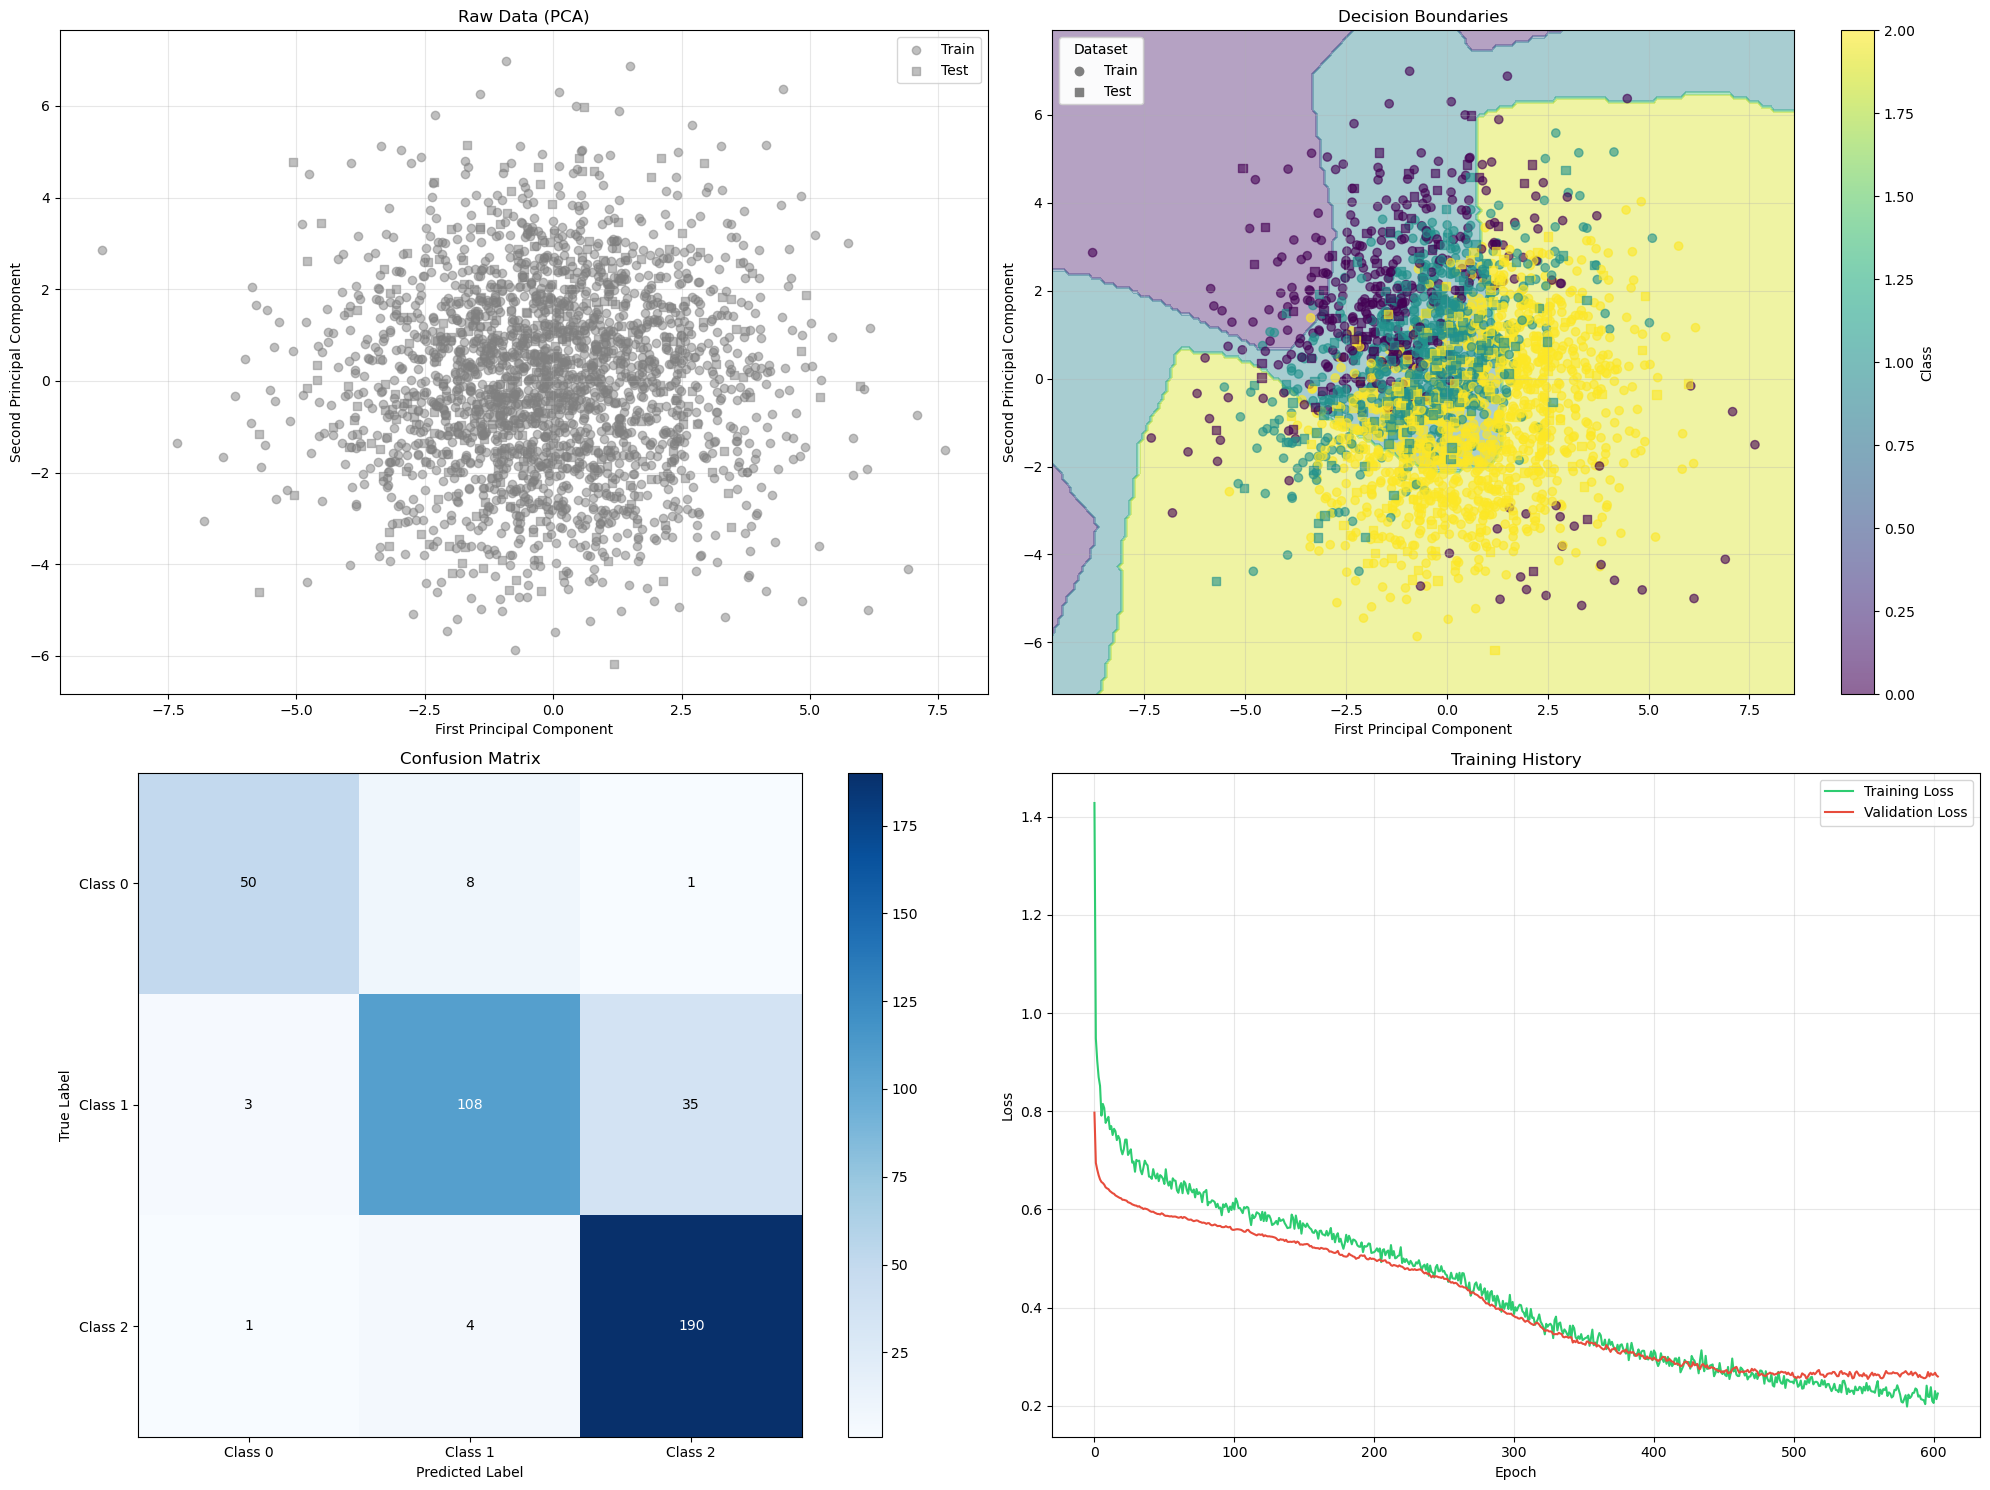


Evaluation Metrics:
--------------------------------------------------
Training Metrics:
Accuracy             0.9400
Precision            0.9401
Recall               0.9263
F1                   0.9328

Test Metrics:
Accuracy             0.8700
Precision            0.8889
Recall               0.8538
F1                   0.8665

Example predictions on new data:

Sample 1:
Class probabilities: [0.07306726 0.50711488 0.41981786]
Predicted class: 1

Sample 2:
Class probabilities: [9.85372602e-01 1.46245352e-02 2.86300893e-06]
Predicted class: 0

Sample 3:
Class probabilities: [0.57353929 0.39319496 0.03326574]
Predicted class: 0

Sample 4:
Class probabilities: [7.97171677e-03 1.34912552e-07 9.92028148e-01]
Predicted class: 2

Sample 5:
Class probabilities: [7.28375459e-04 7.81900020e-04 9.98489725e-01]
Predicted class: 2


In [16]:
if __name__ == "__main__":
    np.random.seed(42)
    
    n_classes = 3
    n_features = 5
    n_train_samples = 2000
    n_test_samples = 400
    
    print("Generating synthetic classification data...")
    X_train, y_train = generate_data(
        n_samples=n_train_samples,
        n_features=n_features,
        n_classes=n_classes,
        noise_level=0.1,
        random_state=42
    )
    
    X_test, y_test = generate_data(
        n_samples=n_test_samples,
        n_features=n_features,
        n_classes=n_classes,
        noise_level=0.1,
        random_state=43
    )
    
    model, metrics = train_and_evaluate_model(X_train, y_train, X_test, y_test, n_classes)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    plt.figure(figsize=(20, 15))
    
    pca = CustomPCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
    
    plt.subplot(2, 2, 1)
    
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
               c='gray', alpha=0.5, marker='o', label='Train')
    
    plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
               c='gray', alpha=0.5, marker='s', label='Test')
    
    plt.title('Raw Data (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    y_train_pred_classes = np.argmax(train_predictions, axis=1)
    y_test_pred_classes = np.argmax(test_predictions, axis=1)
    
    plt.subplot(2, 2, 2)
    
    x_min = min(X_train_2d[:, 0].min(), X_test_2d[:, 0].min()) - 1
    x_max = max(X_train_2d[:, 0].max(), X_test_2d[:, 0].max()) + 1
    y_min = min(X_train_2d[:, 1].min(), X_test_2d[:, 1].min()) - 1
    y_max = max(X_train_2d[:, 1].max(), X_test_2d[:, 1].max()) + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    grid_points_2d = np.c_[xx.ravel(), yy.ravel()]
    grid_points = pca.inverse_transform(grid_points_2d)
    
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    scatter_train = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                              c=y_train_classes, cmap='viridis', 
                              alpha=0.6, marker='o', label='Train')
    
    scatter_test = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
                             c=y_test_classes, cmap='viridis', 
                             alpha=0.6, marker='s', label='Test')
    
    plt.title('Decision Boundaries')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True, alpha=0.3)
    
    legend_elements = scatter_train.legend_elements()[0]
    class_labels = [f'Class {i}' for i in range(n_classes)]
    plt.legend(legend_elements, class_labels, loc='upper right', title='Classes')
    
    empty_train = plt.scatter([], [], c='gray', marker='o', label='Train')
    empty_test = plt.scatter([], [], c='gray', marker='s', label='Test')
    second_legend = plt.legend(handles=[empty_train, empty_test], 
                             loc='upper left', title='Dataset')
    plt.gca().add_artist(second_legend)
    
    plt.colorbar(scatter_train, label='Class')
    
    plt.subplot(2, 2, 3)
    confusion_matrix = np.zeros((n_classes, n_classes))
    for i in range(len(y_test_classes)):
        confusion_matrix[y_test_classes[i], y_test_pred_classes[i]] += 1
    
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, [f'Class {i}' for i in range(n_classes)])
    plt.yticks(tick_marks, [f'Class {i}' for i in range(n_classes)])
    
    thresh = confusion_matrix.max() / 2
    for i in range(n_classes):
        for j in range(n_classes):
            plt.text(j, i, f'{int(confusion_matrix[i, j])}',
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.subplot(2, 2, 4)
    plt.plot(model.training_loss, label='Training Loss', color='#2ecc71')
    plt.plot(model.validation_loss, label='Validation Loss', color='#e74c3c')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nEvaluation Metrics:")
    print("-" * 50)
    print("Training Metrics:")
    train_metrics = calculate_classification_metrics(y_train, train_predictions)
    for metric, value in train_metrics.items():
        print(f"{metric:20} {value:.4f}")
        
    print("\nTest Metrics:")
    test_metrics = calculate_classification_metrics(y_test, test_predictions)
    for metric, value in test_metrics.items():
        print(f"{metric:20} {value:.4f}")
    
    print("\nExample predictions on new data:")
    X_new = np.random.randn(5, n_features) * 2  
    probabilities = model.predict(X_new)
    predicted_classes = np.argmax(probabilities, axis=1)
    
    for i in range(len(X_new)):
        print(f"\nSample {i+1}:")
        print(f"Class probabilities: {probabilities[i]}")
        print(f"Predicted class: {predicted_classes[i]}")

### Benchmark Testing: Iris Dataset Classification

#### Data Preparation Functions

##### 1. Custom Train-Test Split
```python
def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Randomly splits data into training and test sets
    
    Parameters:
        X: Feature matrix
        y: Target vector
        test_size: Proportion of dataset to include in test split
        random_state: Random seed for reproducibility
    """
```

##### 2. One-Hot Encoding
```python
def one_hot_encode(y):
    """
    Converts categorical labels to one-hot encoded format
    
    Example:
    [0, 1, 2] → [[1,0,0], [0,1,0], [0,0,1]]
    """
```

#### Iris Dataset Characteristics

- **Features (4)**: 
  - Sepal length
  - Sepal width
  - Petal length
  - Petal width
  
- **Classes (3)**:
  - Setosa
  - Versicolor
  - Virginica

#### Model Configuration

```python
model = MultiLayerPerceptron(
    layer_sizes=[4, 8, 8, 3],  # [input, hidden1, hidden2, output]
    learning_rate=0.01,
    max_epochs=1000,
    activation='relu',
    optimizer='adam',
    weight_init='he',
    batch_size=32,
    dropout_rate=0.1,
    l2_lambda=0.001
)
```

#### Visualization Components

##### 1. PCA Data Visualization
- Shows 2D projection of 4D feature space
- Reveals natural clustering of iris species

##### 2. Decision Boundaries
- Displays model's learned decision regions
- Color-coded regions for each class
- Points show actual data distribution

##### 3. Confusion Matrix
```
                Predicted
Actual   Setosa  Versicolor  Virginica
Setosa     n₁₁      n₁₂        n₁₃
Versicolor n₂₁      n₂₂        n₂₃
Virginica  n₃₁      n₃₂        n₃₃
```
Where nᵢⱼ represents the count of class i samples predicted as class j

##### 4. Training History
- Training loss vs epochs
- Validation loss vs epochs
- Shows convergence and potential overfitting

#### Performance Metrics

For each class i:

1. **Precision**:
   $P_i = \frac{TP_i}{TP_i + FP_i}$

2. **Recall**:
   $R_i = \frac{TP_i}{TP_i + FN_i}$

3. **F1 Score**:
   $F1_i = 2 \cdot \frac{P_i \cdot R_i}{P_i + R_i}$

4. **Accuracy**:
   $ACC = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$

#### Sample Prediction Output
```
Sample Features:
- Sepal length: x₁
- Sepal width:  x₂
- Petal length: x₃
- Petal width:  x₄

True class: [class_name]
Predicted class: [class_name]
Class probabilities: [p₁, p₂, p₃]
```

#### Interpreting Results

##### 1. Decision Boundary Plot
- Clear separation between classes indicates good model performance
- Overlap regions suggest classification uncertainty
- Points far from decision boundaries represent confident predictions

##### 2. Confusion Matrix
- Diagonal elements show correct predictions
- Off-diagonal elements show misclassifications
- Perfect classification would show zeros off-diagonal

##### 3. Training History
- Converging loss curves indicate successful training
- Gap between training and validation loss suggests generalization level
- Fluctuations indicate training stability

##### 4. PCA Visualization
- Clusters indicate natural class separation
- Overlapping regions suggest inherent classification difficulty
- Explained variance ratio shows information retained in 2D projection

Loading Iris dataset...

Dataset Summary:
--------------------------------------------------
Dataset: iris
Number of samples: 150
Number of features: 4
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Training samples: 120
Test samples: 30

Training model...
Epoch 0, Training Loss: 1.9238, Training Accuracy: 0.1562
Validation Loss: 1.1538, Validation Accuracy: 0.2083
Epoch 100, Training Loss: 0.1033, Training Accuracy: 0.9583
Validation Loss: 0.2319, Validation Accuracy: 0.8333
Early stopping at epoch 136


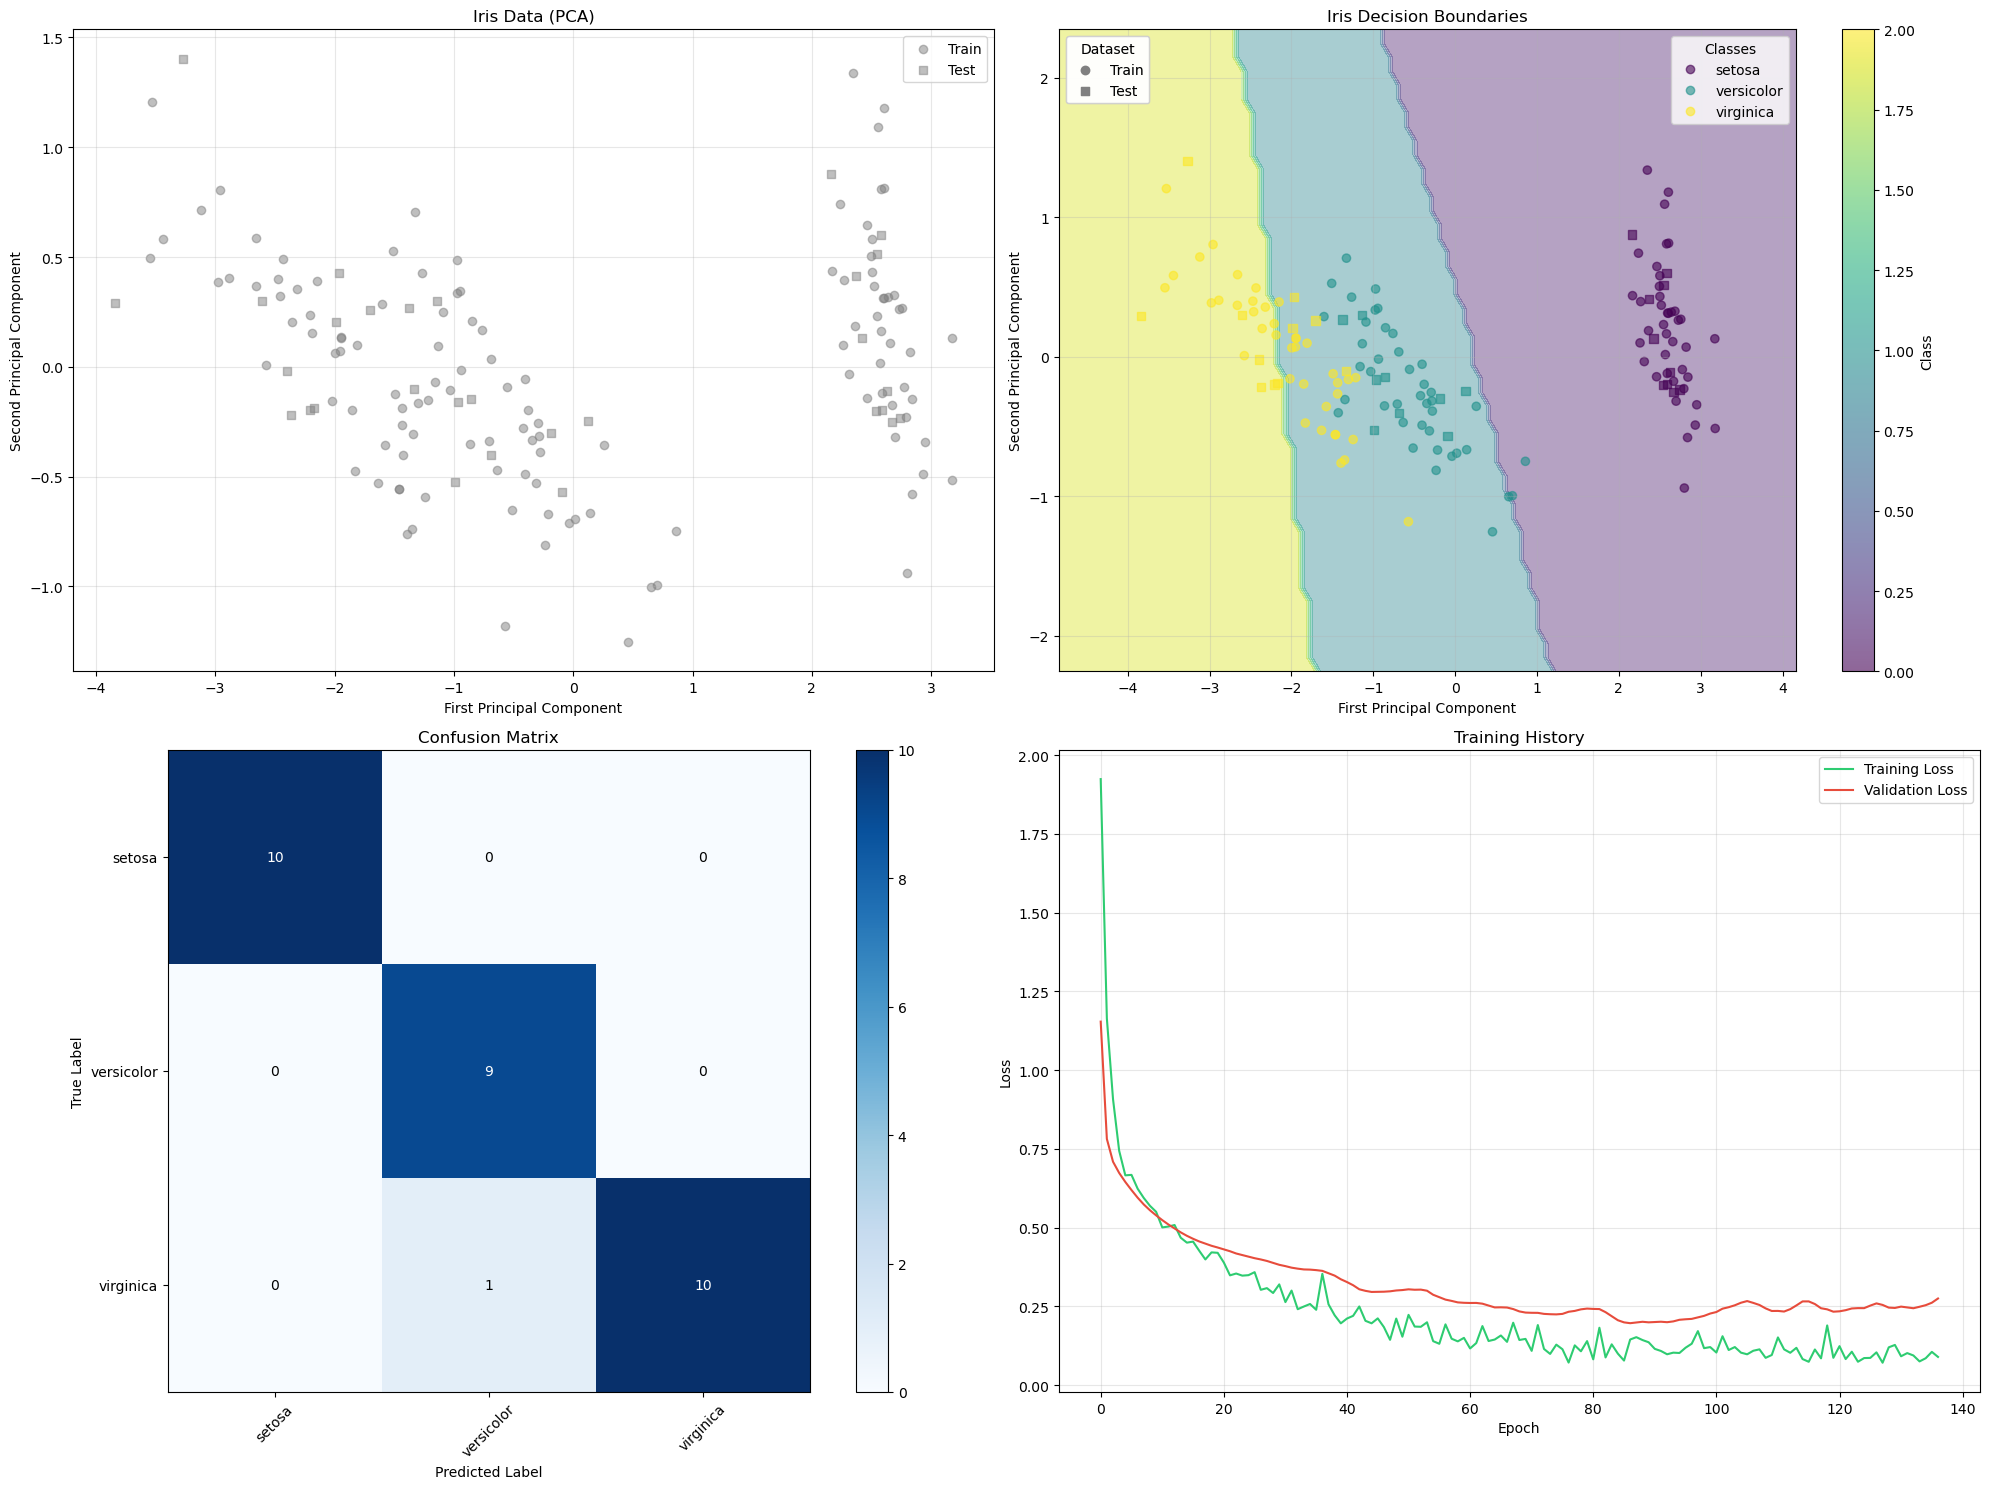


Evaluation Metrics:
--------------------------------------------------

Training Metrics:
Accuracy             0.9583
Precision            0.9604
Recall               0.9577
F1                   0.9582

Test Metrics:
Accuracy             0.9667
Precision            0.9667
Recall               0.9697
F1                   0.9666

Example predictions from test set:

Sample 1:
Features: sepal length=6.1, sepal width=2.8, petal length=4.7, petal width=1.2
True class: versicolor
Predicted class: versicolor
Class probabilities: [0.00933995 0.9818121  0.00884795]

Sample 2:
Features: sepal length=5.7, sepal width=3.8, petal length=1.7, petal width=0.3
True class: setosa
Predicted class: setosa
Class probabilities: [1.00000000e+00 7.65433546e-16 4.71964167e-14]

Sample 3:
Features: sepal length=7.7, sepal width=2.6, petal length=6.9, petal width=2.3
True class: virginica
Predicted class: virginica
Class probabilities: [1.19293589e-06 2.10849021e-05 9.99977722e-01]

Sample 4:
Features: sepal le

In [18]:
from sklearn.datasets import load_iris

def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Split arrays into random train and test subsets
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

def one_hot_encode(y):
    """
    Convert label vector to one-hot encoded matrix
    """
    n_samples = len(y)
    n_classes = len(np.unique(y))
    
    one_hot = np.zeros((n_samples, n_classes))
    
    one_hot[np.arange(n_samples), y.ravel()] = 1
    
    return one_hot

def load_benchmark_data(dataset_name="iris", test_size=0.2, random_state=42):
    """
    Load and prepare benchmark dataset for classification
    """
    if dataset_name.lower() == "iris":
        data = load_iris()
        X = data.data
        y = data.target.reshape(-1, 1)
        feature_names = data.feature_names
        target_names = data.target_names
    else:
        raise ValueError(f"Dataset {dataset_name} not implemented yet")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state
    )
    
    y_train = one_hot_encode(y_train)
    y_test = one_hot_encode(y_test)
    
    n_classes = len(np.unique(data.target))
    
    print(f"\nDataset Summary:")
    print("-" * 50)
    print(f"Dataset: {dataset_name}")
    print(f"Number of samples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of classes: {n_classes}")
    print(f"Feature names: {feature_names}")
    print(f"Target names: {target_names}")
    print(f"Training samples: {X_train.shape[0]}")
    print(f"Test samples: {X_test.shape[0]}")
    
    return X_train, X_test, y_train, y_test, n_classes

if __name__ == "__main__":
    np.random.seed(42)
    
    print("Loading Iris dataset...")
    X_train, X_test, y_train, y_test, n_classes = load_benchmark_data(
        dataset_name="iris",
        test_size=0.2,
        random_state=42
    )
    
    model = MultiLayerPerceptron(
        layer_sizes=[4, 8, 8, 3],  
        learning_rate=0.01,
        max_epochs=1000,
        activation='relu',
        optimizer='adam',
        weight_init='he',
        batch_size=32,
        dropout_rate=0.1,  
        l2_lambda=0.001,
        momentum=0.9,
        early_stopping_patience=50,
        learning_rate_decay=0.0001,
        validation_split=0.2
    )
    
    print("\nTraining model...")
    model.train(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    plt.figure(figsize=(20, 15))
    
    pca = CustomPCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
    
    plt.subplot(2, 2, 1)
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
               c='gray', alpha=0.5, marker='o', label='Train')
    plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
               c='gray', alpha=0.5, marker='s', label='Test')
    plt.title('Iris Data (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    y_train_pred_classes = np.argmax(train_predictions, axis=1)
    y_test_pred_classes = np.argmax(test_predictions, axis=1)
    
    plt.subplot(2, 2, 2)
    
    x_min = min(X_train_2d[:, 0].min(), X_test_2d[:, 0].min()) - 1
    x_max = max(X_train_2d[:, 0].max(), X_test_2d[:, 0].max()) + 1
    y_min = min(X_train_2d[:, 1].min(), X_test_2d[:, 1].min()) - 1
    y_max = max(X_train_2d[:, 1].max(), X_test_2d[:, 1].max()) + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    grid_points_2d = np.c_[xx.ravel(), yy.ravel()]
    grid_points = pca.inverse_transform(grid_points_2d)
    
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    scatter_train = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                              c=y_train_classes, cmap='viridis', 
                              alpha=0.6, marker='o', label='Train')
    scatter_test = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
                             c=y_test_classes, cmap='viridis', 
                             alpha=0.6, marker='s', label='Test')
    
    plt.title('Iris Decision Boundaries')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True, alpha=0.3)
    
    iris = load_iris()
    class_labels = iris.target_names  
    legend1 = plt.legend(scatter_train.legend_elements()[0], 
                        class_labels,
                        loc='upper right', 
                        title='Classes')
    plt.gca().add_artist(legend1)
    
    empty_train = plt.scatter([], [], c='gray', marker='o', label='Train')
    empty_test = plt.scatter([], [], c='gray', marker='s', label='Test')
    second_legend = plt.legend(handles=[empty_train, empty_test], 
                             loc='upper left', 
                             title='Dataset')
    plt.gca().add_artist(second_legend)
    
    plt.colorbar(scatter_train, label='Class')
    
    plt.subplot(2, 2, 3)
    confusion_matrix = np.zeros((n_classes, n_classes))
    for i in range(len(y_test_classes)):
        confusion_matrix[y_test_classes[i], y_test_pred_classes[i]] += 1
    
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    plt.xticks(np.arange(n_classes), class_labels, rotation=45)
    plt.yticks(np.arange(n_classes), class_labels)
    
    thresh = confusion_matrix.max() / 2
    for i in range(n_classes):
        for j in range(n_classes):
            plt.text(j, i, f'{int(confusion_matrix[i, j])}',
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.subplot(2, 2, 4)
    plt.plot(model.training_loss, label='Training Loss', color='#2ecc71')
    plt.plot(model.validation_loss, label='Validation Loss', color='#e74c3c')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nEvaluation Metrics:")
    print("-" * 50)
    print("\nTraining Metrics:")
    train_metrics = calculate_classification_metrics(y_train, train_predictions)
    for metric, value in train_metrics.items():
        print(f"{metric:20} {value:.4f}")
    
    print("\nTest Metrics:")
    test_metrics = calculate_classification_metrics(y_test, test_predictions)
    for metric, value in test_metrics.items():
        print(f"{metric:20} {value:.4f}")
    
    print("\nExample predictions from test set:")
    iris = load_iris()
    for i in range(5):  
        idx = i
        true_class = iris.target_names[y_test_classes[idx]]
        pred_class = iris.target_names[y_test_pred_classes[idx]]
        features = X_test[idx]
        print(f"\nSample {i+1}:")
        print(f"Features: sepal length={features[0]:.1f}, sepal width={features[1]:.1f}, "
              f"petal length={features[2]:.1f}, petal width={features[3]:.1f}")
        print(f"True class: {true_class}")
        print(f"Predicted class: {pred_class}")
        print(f"Class probabilities: {test_predictions[idx]}")